### K-nn for the  handwritten recognition dataset (MNIST)
### Edgar Acuna
### Noviembre 2019
### running time 30 minutes

In [312]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from skimage import exposure
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [313]:
#Leyendo  el training y test dataset
train=pd.read_csv("c://datamining/mnist_train.csv",header=None)
test=pd.read_csv("c://datamining/mnist_test.csv",header=None)

In [314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [315]:
trainX=train.loc[:,1:785]/255
testX=test.loc[:,1:785]/255
trainY=train.loc[:,0]
testY=test.loc[:,0]
trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1 to 784
dtypes: float64(784)
memory usage: 358.9 MB


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


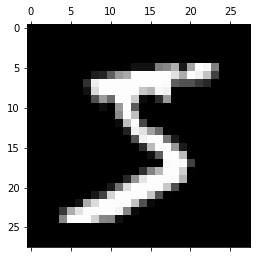

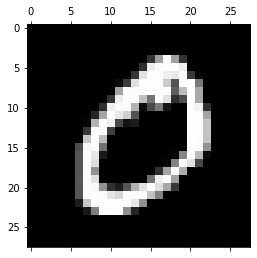

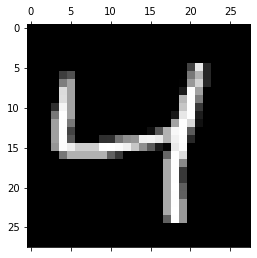

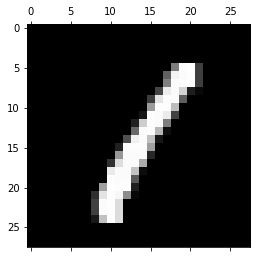

In [316]:
#Visualizando los primeros 4 digitos
for row in trainX.head(n=4).itertuples():
        row=row[1:785]
        row=np.reshape(row,(28,28))
        print(type(row))
        plt.matshow(row)

In [317]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX, trainY)

# Prediciendo los labels del conjunto de prueba
predictions = model.predict(testX)

In [318]:
# Evaluando el rendimiento del clasificador para cada uno de lpos digitos
print("EVALUATION ON TESTING DATA")
print(classification_report(testY, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [319]:
confusion_matrix(testY,predictions)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

<class 'numpy.ndarray'>
The image represents the digit: 1


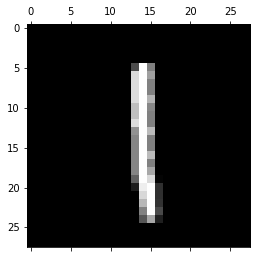

In [320]:
# Cotejando las predicciones contra las imagenes 
# Eligiendo al azar una imagen
import numpy as np
from skimage import exposure
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
test1=np.array(testX)
i=np.random.randint(0, 784)
image=test1[i].reshape(1,-1)
print(type(image))
prediction = model.predict(image)[0]
# Convirtiendo la imagen de un arreglo de dimension 728 a una imagen de dimension 64x64 compatibel con OpenVC
# rescalando luego a una imagen de 32x32 pixels para que se vea mejor
#image = image.reshape((28, 28)).astype("uint8")
image=np.reshape(image,(28,28))
#image = exposure.rescale_intensity(image, out_range=(0, 255))
#image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
# Mostrando la prediccion
print("The image represents the digit: {}".format(prediction))
#plt.gray() 
plt.matshow(image) 
#plt.show() 